In [1]:
import pandas as pd

In [11]:
df = pd.read_csv(r"C:\Users\FA22-BBD-035\Desktop\training.1600000.processed.noemoticon.csv", encoding='latin1', sep=',', header=None)


In [13]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [15]:
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


C:\Users\FA22-BBD-035\AppData\Local\Temp\ipykernel_9040\181626504.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [17]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,mon apr 06 22:19:45 pdt 2009,no_query,_thespecialone_,"@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,0,1467810672,mon apr 06 22:19:49 pdt 2009,no_query,scotthamilton,is upset that he can't update his facebook by ...
2,0,1467810917,mon apr 06 22:19:53 pdt 2009,no_query,mattycus,@kenichan i dived many times for the ball. man...
3,0,1467811184,mon apr 06 22:19:57 pdt 2009,no_query,ellectf,my whole body feels itchy and like its on fire
4,0,1467811193,mon apr 06 22:19:57 pdt 2009,no_query,karoli,"@nationwideclass no, it's not behaving at all...."


In [21]:
df.drop(columns=[1, 2, 3, 4], inplace=True)


In [23]:
df.head()

,0,5
0,0,"@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,0,is upset that he can't update his facebook by ...
2,0,@kenichan i dived many times for the ball. man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [25]:
df = df[[0, 5]].copy()
df.columns = ['class', 'text']


In [27]:
df.head()

,class,text
0,0,"@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,0,is upset that he can't update his facebook by ...
2,0,@kenichan i dived many times for the ball. man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [29]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK data files (run once)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if not isinstance(text, str):
        return ''
    
    # 1. Lowercase
    text = text.lower()
    
    # 2. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # 3. Remove mentions (@user)
    text = re.sub(r'@\w+', '', text)
    
    # 4. Remove hashtags (keep text)
    text = re.sub(r'#', '', text)
    
    # 5. Remove punctuations and numbers (keep only alphabets and spaces)
    text = re.sub(r'[^a-z\s]', '', text)
    
    # 6. Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # 7. Tokenize
    words = text.split()
    
    # 8. Remove stopwords and 9. Lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    # Join back to string
    return ' '.join(words)

# Apply preprocessing to the 'text' column
df['text'] = df['text'].apply(preprocess_text)

# Check result
print(df['text'].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\FA22-BBD-035\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\FA22-BBD-035\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\FA22-BBD-035\AppData\Roaming\nltk_data...


0        thats bummer shoulda got david carr third day
1    upset cant update facebook texting might cry r...
2      dived many time ball managed save rest go bound
3                      whole body feel itchy like fire
4                             behaving im mad cant see
Name: text, dtype: object


In [31]:
df.head()

,class,text
0,0,thats bummer shoulda got david carr third day
1,0,upset cant update facebook texting might cry r...
2,0,dived many time ball managed save rest go bound
3,0,whole body feel itchy like fire
4,0,behaving im mad cant see


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   class   1600000 non-null  int64 
 1   text    1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB
None
class
0    800000
4    800000
Name: count, dtype: int64


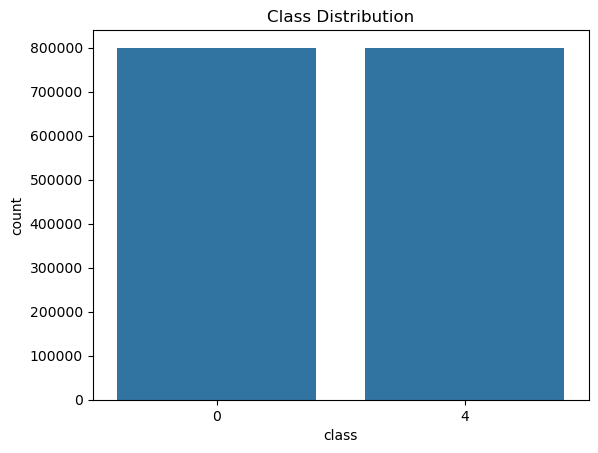

In [33]:
# Check dataset size and info
print(df.info())

# Check class distribution
print(df['class'].value_counts())

# Visualize class distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.show()


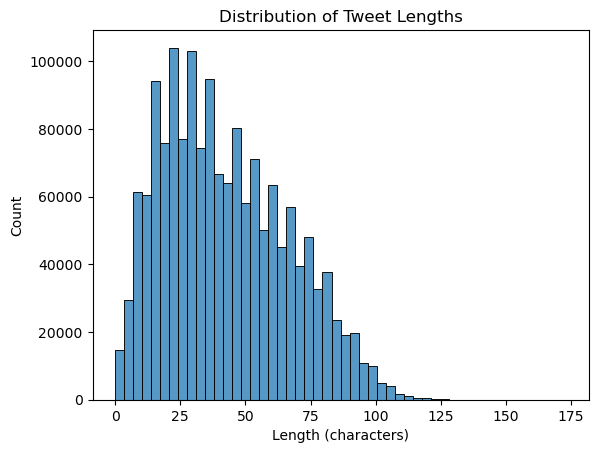

In [35]:
# Original tweet length (number of characters)
df['original_length'] = df['text'].apply(len)

# Visualize tweet length distribution
sns.histplot(df['original_length'], bins=50)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Length (characters)')
plt.show()


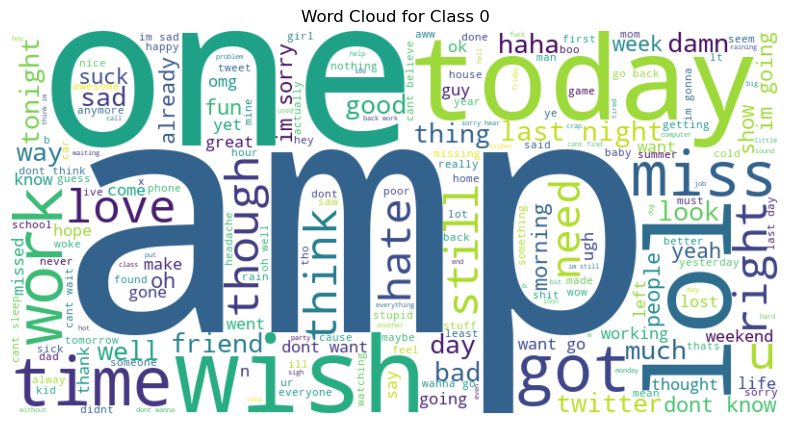

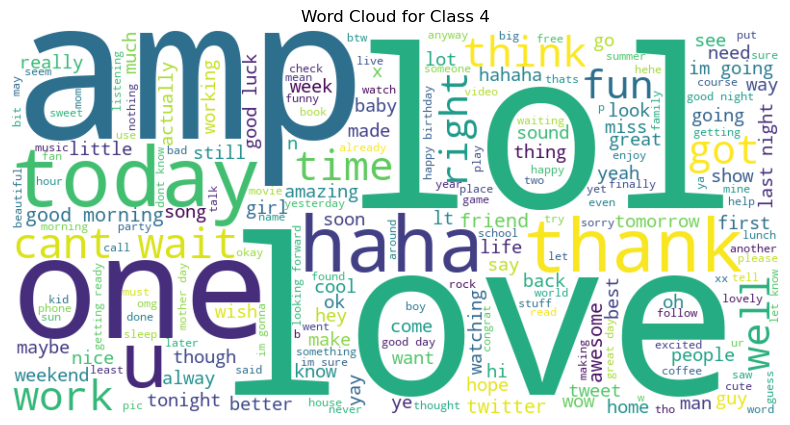

In [41]:
from wordcloud import WordCloud

# Combine tweets per class
for sentiment in df['class'].unique():
    text = ' '.join(df[df['class'] == sentiment]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Class {sentiment}')
    plt.axis('off')
    plt.show()


In [43]:
from collections import Counter

# Overall top 20 words
all_words = ' '.join(df['text']).split()
counter = Counter(all_words)
print("Top 20 overall words:", counter.most_common(20))

# Top 20 words per class
for sentiment in df['class'].unique():
    words = ' '.join(df[df['class'] == sentiment]['text']).split()
    counter = Counter(words)
    print(f"Top 20 words in class {sentiment}: {counter.most_common(20)}")


Top 20 overall words: [('im', 178401), ('day', 104035), ('good', 89535), ('get', 85934), ('like', 79097), ('go', 77449), ('u', 67387), ('dont', 67306), ('love', 66969), ('work', 66498), ('today', 66121), ('going', 64104), ('time', 63800), ('cant', 62900), ('got', 60903), ('back', 56120), ('one', 55884), ('lol', 55215), ('know', 53227), ('really', 49564)]
Top 20 words in class 0: [('im', 103129), ('day', 50062), ('get', 47840), ('go', 47635), ('work', 45572), ('dont', 45158), ('cant', 43773), ('like', 41150), ('today', 36899), ('want', 34033), ('going', 33451), ('got', 33102), ('back', 32592), ('miss', 31737), ('really', 31230), ('time', 30602), ('u', 29188), ('still', 28781), ('good', 28597), ('one', 28316)]
Top 20 words in class 4: [('im', 75272), ('good', 60938), ('day', 53973), ('love', 49509), ('u', 38199), ('get', 38094), ('like', 37947), ('thanks', 33823), ('lol', 33511), ('time', 33198), ('going', 30653), ('go', 29814), ('today', 29222), ('got', 27801), ('one', 27568), ('new', 2

In [45]:
print(df.groupby('class')['text'].count())
print(df.groupby('class')['original_length'].describe())


class
0    800000
4    800000
Name: text, dtype: int64
          count       mean        std  min   25%   50%   75%    max
class                                                              
0      800000.0  43.268981  24.052038  0.0  24.0  40.0  61.0  141.0
4      800000.0  41.480744  23.815958  0.0  22.0  38.0  58.0  173.0


In [47]:
from sklearn.model_selection import train_test_split

X = df['text']
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [53]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)
y_pred_lr = lr.predict(X_test_tfidf)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_tfidf, y_train)
y_pred_dt = dt.predict(X_test_tfidf)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Logistic Regression Accuracy: 0.77339375
              precision    recall  f1-score   support

           0       0.78      0.75      0.77    159494
           4       0.76      0.80      0.78    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000

Naive Bayes Accuracy: 0.757978125
              precision    recall  f1-score   support

           0       0.75      0.77      0.76    159494
           4       0.76      0.75      0.76    160506

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000

Decision Tree Accuracy: 0.716715625
              precision    recall  f1-score   support

           0       0.72      0.71      0.71    159494
           4       0.72      0.72      0.72    160506

    accuracy                           0.72    320000
   macro avg     